In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
engine.execute('SELECT MAX(date) FROM measurement').fetchall()

[('2017-08-23',)]

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

precipitation = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>="2016-08-24").filter(Measurement.date  <="2017-08-23").all()


# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precipitation).set_index('date')

# Sort the dataframe by date
clean_precip_df = precip_df.sort_values(by='date').dropna()
clean_precip_df
# Use Pandas Plotting with Matplotlib to plot the data
# ax = clean_precip_df.plot(rot = 90, title = "Precipitation by Date")
# ax.set_ylabel("inches")
# plt.savefig("Precipitation_Analysis")
# plt.show()


,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
2016-08-24,1.45
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
engine.execute('SELECT COUNT(station) FROM station').fetchall()

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
engine.execute('SELECT COUNT(station), (station) FROM measurement group by (station) order by COUNT(station) DESC').fetchall()

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
engine.execute('SELECT MIN(tobs), MAX(tobs), AVG(tobs)  FROM measurement where station="USC00519281"').fetchall()

[(54.0, 85.0, 71.66378066378067)]

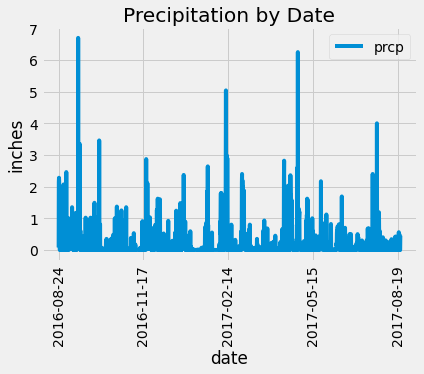

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>="2016-08-24").filter(Measurement.date  <="2017-08-23").filter(Station.station == "USC00519281").all()
station_precip_df = pd.DataFrame(station_precip).set_index('date')

# Sort the dataframe by date
clean_station_precip_df = station_precip_df.sort_values(by='date').dropna()
clean_station_precip_df
# Use Pandas Plotting with Matplotlib to plot the data
ax = clean_station_precip_df.plot(rot = 90, title = "Precipitation by Date")
ax.set_ylabel("inches")
plt.savefig("Precipitation_Analysis")
plt.show()


# Close session

In [16]:
# Close Session
session.close()